<h4> Regresja wielu zmiennych

In [48]:
#dane dotyczą samochodow
autompg = read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                     quote = "\"",
                     comment.char = "",
                     stringsAsFactors = FALSE)

In [49]:
head(autompg)

V1,V2,V3,V4,V5,V6,V7,V8,V9
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165.0,3693,11.5,70,1,buick skylark 320
18,8,318,150.0,3436,11.0,70,1,plymouth satellite
16,8,304,150.0,3433,12.0,70,1,amc rebel sst
17,8,302,140.0,3449,10.5,70,1,ford torino
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


In [50]:
colnames(autompg) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name") #nadaje nazwy kolumnom

In [51]:
autompg = subset(autompg, autompg$hp != "?") #kasujemy brakujące dane (tam gdzie jest ?)

In [52]:
autompg = subset(autompg, autompg$name != "plymouth reliant") #usuwam "playmouth reliant" (z pewnych powodow)

In [54]:
rownames(autompg) = paste(autompg$cyl, "cylinder", autompg$year, autompg$name) #nazywam wiersze

In [55]:
head(autompg) #mpg = miles per gallon (zużycie paliwa)

,mpg,cyl,disp,hp,wt,acc,year,origin,name
8 cylinder 70 chevrolet chevelle malibu,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
8 cylinder 70 buick skylark 320,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
8 cylinder 70 plymouth satellite,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
8 cylinder 70 amc rebel sst,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
8 cylinder 70 ford torino,17,8,302,140.0,3449,10.5,70,1,ford torino
8 cylinder 70 ford galaxie 500,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


In [56]:
autompg = subset(autompg, select = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year")) #wybieram te numeryczne kolumny
head(autompg) 

,mpg,cyl,disp,hp,wt,acc,year
8 cylinder 70 chevrolet chevelle malibu,18,8,307,130.0,3504,12.0,70
8 cylinder 70 buick skylark 320,15,8,350,165.0,3693,11.5,70
8 cylinder 70 plymouth satellite,18,8,318,150.0,3436,11.0,70
8 cylinder 70 amc rebel sst,16,8,304,150.0,3433,12.0,70
8 cylinder 70 ford torino,17,8,302,140.0,3449,10.5,70
8 cylinder 70 ford galaxie 500,15,8,429,198.0,4341,10.0,70


In [58]:
str(autompg)  #struktura danych; hp widzi jako char :/

'data.frame':	390 obs. of  7 variables:
 $ mpg : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl : int  8 8 8 8 8 8 8 8 8 8 ...
 $ disp: num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp  : chr  "130.0" "165.0" "150.0" "150.0" ...
 $ wt  : num  3504 3693 3436 3433 3449 ...
 $ acc : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year: int  70 70 70 70 70 70 70 70 70 70 ...


In [60]:
autompg$hp = as.numeric(autompg$hp) #przerabiam na liczbowe te kolumnę 

In [61]:
mpg_model = lm(mpg ~ wt + year, data = autompg)
summary(mpg_model)


Call:
lm(formula = mpg ~ wt + year, data = autompg)

Residuals:
   Min     1Q Median     3Q    Max 
-8.852 -2.292 -0.100  2.039 14.325 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.464e+01  4.023e+00  -3.638 0.000312 ***
wt          -6.635e-03  2.149e-04 -30.881  < 2e-16 ***
year         7.614e-01  4.973e-02  15.312  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.431 on 387 degrees of freedom
Multiple R-squared:  0.8082,	Adjusted R-squared:  0.8072 
F-statistic: 815.6 on 2 and 387 DF,  p-value: < 2.2e-16


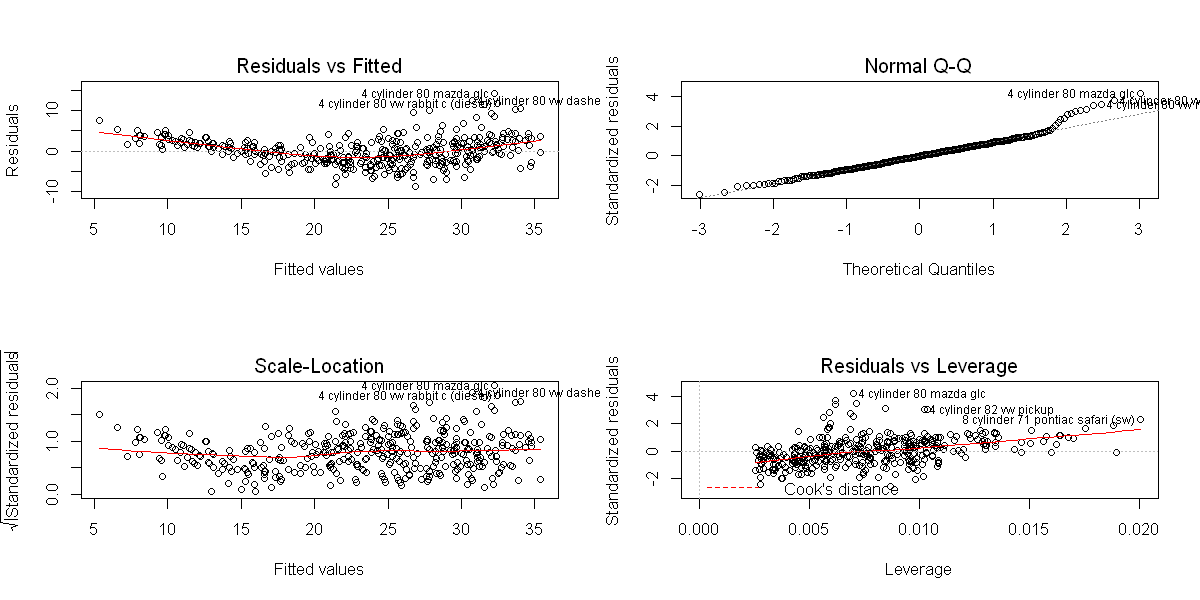

In [69]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(2, 2));
plot(mpg_model)

In [62]:
summary(mpg_model)$sigma

[1] 3.431367

In [63]:
summary(mpg_model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-14.637641945,4.0233913563,-3.638135,3.118311e-04
wt,-0.006634876,0.0002148504,-30.881372,1.850466e-106
year,0.761401955,0.0497265950,15.311765,1.036597e-41


In [64]:
coef(mpg_model)

(Intercept)            wt          year 
-14.637641945  -0.006634876   0.761401955

In [65]:
#nowa obserwacja (waga (pounds) i rok produkcji)
new_cars = data.frame(wt = c(3500, 5000), year = c(76, 81))
new_cars

wt,year
3500,76
5000,81


In [66]:
predict(mpg_model, newdata = new_cars, interval = "confidence", level = 0.99) #czy mozemy ufac tym predykcjom?

fit,lwr,upr
20.00684,19.4712,20.54248
13.86154,12.3341,15.38898


In [71]:
range(autompg$wt); range(autompg$year)

[1] 1613 5140

[1] 70 82

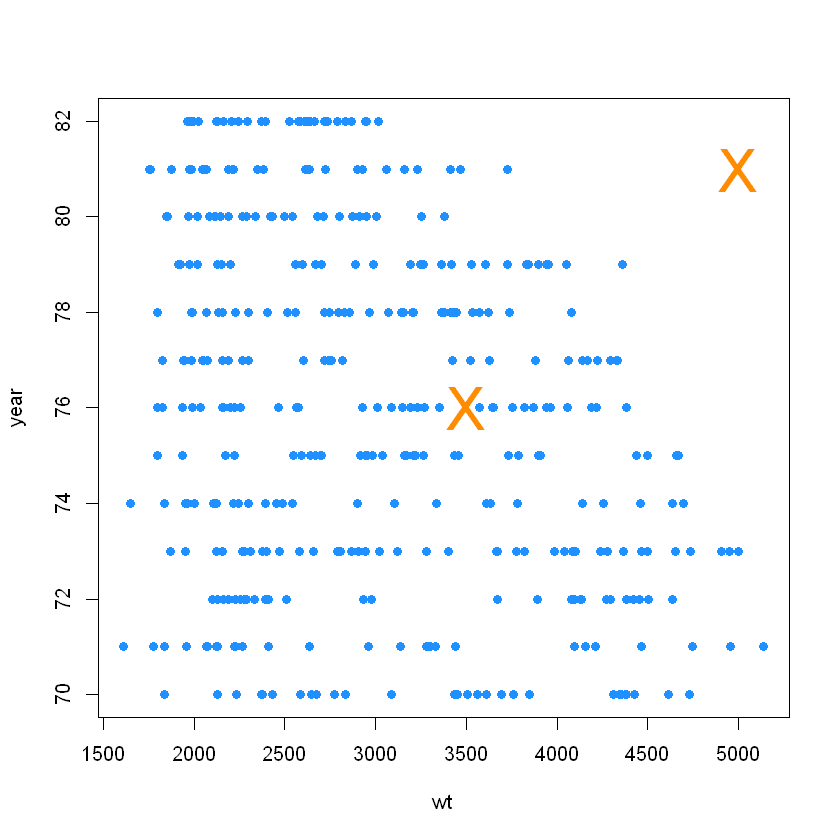

In [67]:
plot(year ~ wt, data = autompg, pch = 20, col = "dodgerblue", cex = 1.5) 
points(new_cars, col = "darkorange", cex = 3, pch = "X")

Porównywanie modeli

In [77]:
null_mpg_model = lm(mpg ~ 1, data = autompg) #model bez zmiennych 
full_mpg_model = lm(mpg ~ wt + year, data = autompg) #model jak poprzednio

print(anova(null_mpg_model, full_mpg_model)) #porownuje dwa modele, p_value male więc wt lub year ma znaczacy wplyw na mpg

Analysis of Variance Table

Model 1: mpg ~ 1
Model 2: mpg ~ wt + year
  Res.Df     RSS Df Sum of Sq      F    Pr(>F)    
1    389 23761.7                                  
2    387  4556.6  2     19205 815.55 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


<h4>
Zadanie1. Rozważ plik "dane9.txt".
    
- Wyznacz współczynniki korelacji pomiędzy $x1$ a $y$, $x2$ a $y$ oraz $x3$ a $y$. Zinterpretuj ich znak i wartość.
- Zbuduj model liniowy, gdzie $y$ zależy od wszystkich pozostałych zmiennych (model1). Które zmienne wydają się istotne?
- Zbuduj model liniowy, gdzie $y$ zależy tylko od zmiennych wytypowanych jako istotne w poprzednim punkcie (model2).
- Za pomocą F testu (polecenie anova) porównaj model1 i model2. 
- Skomentuj otrzymane wyniki.



<h4> Kryteria oceny modelu

- kryterium GIC (im mniejsza wartość GIC tym lepszy model); $AIC(stats)$
- współczynnik $R^2$ (jeżeli modele nie różnią się liczbą predyktorów, to im większy $R^2$ tym lepiej)
- statystyka Cp Mallowsa (im mniejsza wartość tym lepszy model); $cp(locfit)$

In [32]:
library(liver) #tu są moje dane 
data(cereal) 
head(cereal)

name,manuf,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,cold,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
100% Natural Bran,Q,cold,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
All-Bran,K,cold,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
All-Bran with Extra Fiber,K,cold,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
Almond Delight,R,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
Apple Cinnamon Cheerios,G,cold,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


In [37]:
model1 = lm(rating~calories+protein+shelf, data=cereal)
summary(model1)


Call:
lm(formula = rating ~ calories + protein + shelf, data = cereal)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.225  -5.452  -1.078   3.927  21.063 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 79.94741    5.55832  14.383  < 2e-16 ***
calories    -0.50565    0.04564 -11.078  < 2e-16 ***
protein      6.16014    0.81584   7.551  9.8e-11 ***
shelf        0.49079    1.07776   0.455     0.65    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.716 on 73 degrees of freedom
Multiple R-squared:  0.7102,	Adjusted R-squared:  0.6983 
F-statistic: 59.62 on 3 and 73 DF,  p-value: < 2.2e-16


In [39]:
model2 = lm(rating~calories+protein, data=cereal)
summary(model2)


Call:
lm(formula = rating ~ calories + protein, data = cereal)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8461  -5.5013  -0.9633   3.7361  20.4813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.69321    5.28303   15.27  < 2e-16 ***
calories    -0.50367    0.04519  -11.14  < 2e-16 ***
protein      6.20943    0.80428    7.72 4.37e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.675 on 74 degrees of freedom
Multiple R-squared:  0.7094,	Adjusted R-squared:  0.7015 
F-statistic:  90.3 on 2 and 74 DF,  p-value: < 2.2e-16


In [105]:
AIC(model1); AIC(model2) #nie ma korzysci z uzywania zmiennej shelf

[1] 458.6072

[1] 455.7307

<h4> Zadanie2: Zbuduj model liniowy, opisujący $rating$ poprzez $sugars$ i $fiber$. Następnie:

- Wyznacz obserwacje odstające (za pomocą metody outlierTest). Ile ich jest?
- Wyznacz obserwacje wpływowe (za pomocą metody influence.measures). Ile ich jest?
    
Następnie zbuduj model liniowy, opisujący $rating$ tylko od $sugars$. Czy model ten istotnie różni się od poprzedniego (zmienna $fiber$ wnosi istotny wkład do modelu)? Wykorzystaj anova i AIC.

<h4> Współliniowość zmiennych objaśniających

$VIF_{j} = \frac{1}{1-R_{j}^2}$, gdzie $R_{j}^{2}$ - współczynnik determinacji j-tej zmiennej przez pozostałe zmienne objaśniające

Uwagi:
- nie uwzględnia $y$
- bada się tylko skorelowanie zmiennych objaśniających
- im $R_{j}^{2}$ więkze tym mianownik mniejszy i $VIF_{j}$ większy, co oznacza silną korelacje
- w przypadku braku korelacji $VIF_{j} = 1$ ($R_{j}^{2}=0)$

Co można zrobić?

- usunąć wybrane zmienne (te najbardziej skorelowane) -> efekt: zmniejszenie VIF pozostałych zmiennych
- zastosować metodę redukcji zmiennych (np PCA)
- wprowadzić ograniczenia na parametry modelu 

In [17]:
x1 = runif(100)
x2 = runif(100)
x3 = 2*x1+4*x2 + rnorm(100, 0, 0.5) #x3 to kombinacja x1 i x2 z pewnym elementem losowym
y = runif(100)

d = data.frame(x1=x1, x2=x2, x3=x3, y=y)
head(d)

x1,x2,x3,y
0.5582598,0.4650301,2.5040964,0.5775127
0.7458688,0.0439027,1.7963774,0.2516328
0.3467764,0.4162582,2.5730692,0.4189995
0.9618332,0.8919916,5.4237271,0.8431471
0.6167986,0.4001564,2.9084295,0.7138060
0.0285002,0.1332485,0.1327814,0.0792332


In [18]:
library(car)
vif(lm(y~., data = d))

x1       x2       x3 
2.442149 6.349351 7.713179

In [22]:
vif(lm(y~x1+x2, data = d)) #po usunięciu x3

x1       x2 
1.000197 1.000197

<h4> Co gdy liczba regresorów porównywalna z liczbą obserwacji?

In [96]:
y = rnorm(100)
X = matrix(rnorm(9800), 100, 98)

summary(lm(y~X)) #fałszywie duze R^2


Call:
lm(formula = y ~ X)

Residuals:
         1          2          3          4          5          6          7 
 0.0125131 -0.0565654  0.0862467 -0.0941489 -0.0353174  0.0434941 -0.0377037 
         8          9         10         11         12         13         14 
-0.0114015  0.0347324 -0.0269343  0.0313591 -0.0113142 -0.0410403 -0.0070840 
        15         16         17         18         19         20         21 
 0.0794227 -0.0357179  0.0222622 -0.0271307 -0.0212251 -0.0163842  0.0090101 
        22         23         24         25         26         27         28 
-0.0202205  0.0199456  0.0588207 -0.0660202 -0.0814033  0.0380632  0.0327043 
        29         30         31         32         33         34         35 
-0.0617573 -0.0349054  0.0182319  0.0467204 -0.0301750  0.0555329  0.0371223 
        36         37         38         39         40         41         42 
 0.0004916  0.0050699  0.0392406  0.0055555 -0.0249152 -0.0268437  0.0284485 
        43         44    

In [97]:
summary(lm(y~X))$r.squared; summary(lm(y~X))$adj.r.squared #ekstrakcja samego Multiple R-squared czy Adjusted R-squared

[1] 0.9980469

[1] 0.8066393

<h4> Zadanie3: Rozważ $y$ jak poprzednio. Następnie wygeneruj zmienne $X$, przy czym liczbę cech zmieniaj od 1 do 100. Narysuj wykres zależności: Multiple R-squared od liczby cech. Skomentuj otrzymany wynik.

<h4> Zmienne kategoryczne

In [2]:
library(MASS)

In [3]:
head(survey)

Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


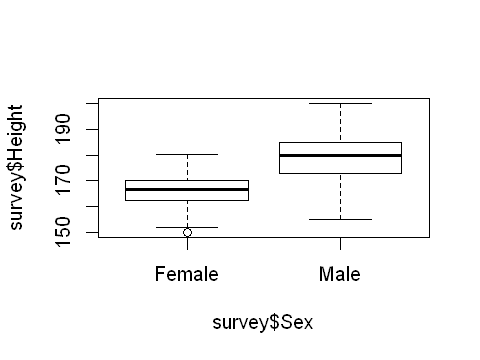

In [5]:
options(repr.plot.width=4, repr.plot.height=3)
plot(survey$Height~survey$Sex)

In [6]:
means.sex = tapply(survey$Height,INDEX=survey$Sex,FUN=mean,na.rm=TRUE)
means.sex

Female     Male 
165.6867 178.8260

In [7]:
survfit <- lm(Height~Sex,data=survey) #wsp dobre ale R^2 slabe; y =ax+b, gdzie x=0 -> kobieta, x=1 -> mezczyzna
summary(survfit)


Call:
lm(formula = Height ~ Sex, data = survey)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.886  -5.667   1.174   4.358  21.174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  165.687      0.730  226.98   <2e-16 ***
SexMale       13.139      1.022   12.85   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.372 on 206 degrees of freedom
  (29 observations deleted due to missingness)
Multiple R-squared:  0.4449,	Adjusted R-squared:  0.4422 
F-statistic: 165.1 on 1 and 206 DF,  p-value: < 2.2e-16


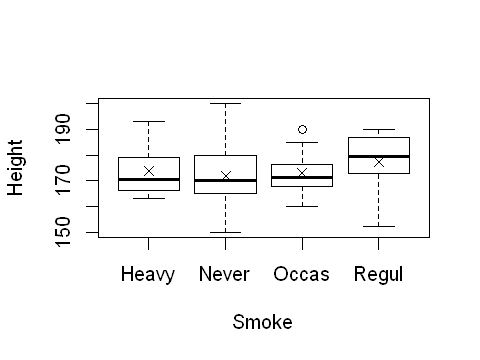

In [8]:
boxplot(Height~Smoke,data=survey)
points(1:4,tapply(survey$Height,survey$Smoke,mean,na.rm=TRUE),pch=4)

In [9]:
tapply(survey$Height,INDEX=survey$Smoke,FUN=mean,na.rm=TRUE)

Heavy    Never    Occas    Regul 
173.7720 171.8200 173.0288 177.4171

In [10]:
survfit2 <- lm(Height~Smoke,data=survey) #Heavy siedzi w wyrazie wolnym
summary(survfit2)


Call:
lm(formula = Height ~ Smoke, data = survey)

Residuals:
   Min     1Q Median     3Q    Max 
-25.02  -6.82  -1.64   8.18  28.18 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 173.7720     3.1028  56.005   <2e-16 ***
SmokeNever   -1.9520     3.1933  -0.611    0.542    
SmokeOccas   -0.7433     3.9553  -0.188    0.851    
SmokeRegul    3.6451     4.0625   0.897    0.371    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.812 on 205 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.02153,	Adjusted R-squared:  0.007214 
F-statistic: 1.504 on 3 and 205 DF,  p-value: 0.2147


<h4> Zadanie4: Wyjaśnij skąd wzięły się wartości współczynników w powyższym modelu.

In [11]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


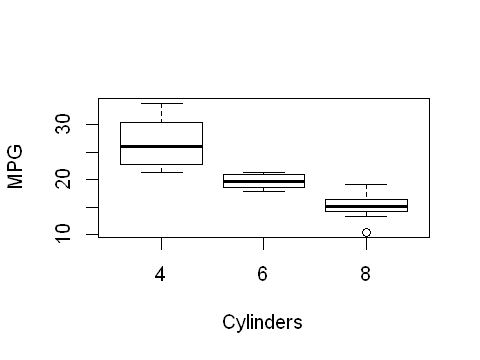

In [12]:
boxplot(mtcars$mpg~mtcars$cyl, xlab="Cylinders", ylab="MPG") #traktujemy cyl jak zmienną numeryczna

In [13]:
carfit <- lm(mpg~cyl,data=mtcars)
summary(carfit)


Call:
lm(formula = mpg ~ cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9814 -2.1185  0.2217  1.0717  7.5186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.8846     2.0738   18.27  < 2e-16 ***
cyl          -2.8758     0.3224   -8.92 6.11e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.206 on 30 degrees of freedom
Multiple R-squared:  0.7262,	Adjusted R-squared:  0.7171 
F-statistic: 79.56 on 1 and 30 DF,  p-value: 6.113e-10


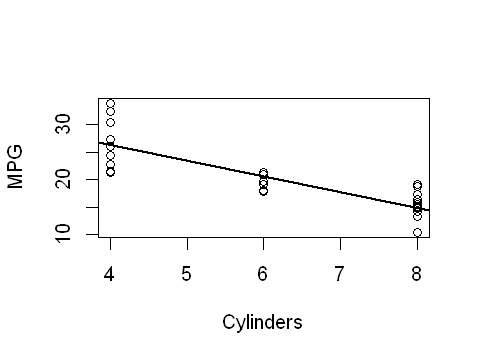

In [14]:
plot(mtcars$mpg~mtcars$cyl, xlab="Cylinders", ylab="MPG")
abline(carfit,lwd=2)

In [15]:
#jezeli chcemy traktowac jako Factor
carfit <- lm(mpg~factor(cyl), data=mtcars)
summary(carfit)


Call:
lm(formula = mpg ~ factor(cyl), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2636 -1.8357  0.0286  1.3893  7.2364 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.6636     0.9718  27.437  < 2e-16 ***
factor(cyl)6  -6.9208     1.5583  -4.441 0.000119 ***
factor(cyl)8 -11.5636     1.2986  -8.905 8.57e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.223 on 29 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.714 
F-statistic:  39.7 on 2 and 29 DF,  p-value: 4.979e-09


In [16]:
print(factor(mtcars$cyl))

 [1] 6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4
Levels: 4 6 8


In [17]:
c1 = c(1,0,0) #6 
c2 = c(0,1,0) #4 
c3 = c(0,0,1) #8 

In [19]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [21]:
tapply(mtcars$mpg,mtcars$cyl, mean)

4        6        8 
26.66364 19.74286 15.10000

In [22]:
wsp = c(26.6636,-6.9208,-11.5636)

dla_6 = sum(wsp*c(1,0,0))
dla_4 = sum(wsp*c(1,1,0))
dla_8 = sum(wsp*c(1,0,1))
dla_6; dla_4; dla_8

[1] 26.6636

[1] 19.7428

[1] 15.1

<h3> Uzupełnienie: Jeszcze raz ANOVA

ANOVA jednoczynnikowa a regresja liniowa z jedną zmienną kategoryczną

In [23]:
data = read.table("dane_a.txt", header = FALSE)
head(data)

V1,V2
93,s1
120,s1
65,s1
105,s1
115,s1
82,s1


In [24]:
summary(data)

       V1          V2    
 Min.   : 28.00   s1:15  
 1st Qu.: 55.00   s2:11  
 Median : 78.00   s3:12  
 Mean   : 74.04   s4: 9  
 3rd Qu.: 93.00          
 Max.   :120.00          

In [28]:
model = lm(V1~V2,data=data) 
summary(model)


Call:
lm(formula = V1 ~ V2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.667 -12.061  -1.455  12.111  42.250 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   94.667      4.377  21.630  < 2e-16 ***
V2s2         -38.212      6.729  -5.679 1.07e-06 ***
V2s3         -36.917      6.565  -5.623 1.29e-06 ***
V2s4         -11.778      7.147  -1.648    0.107    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.95 on 43 degrees of freedom
Multiple R-squared:  0.5253,	Adjusted R-squared:  0.4922 
F-statistic: 15.86 on 3 and 43 DF,  p-value: 4.342e-07


In [29]:
summary(aov(V1~V2,data=data))

            Df Sum Sq Mean Sq F value   Pr(>F)    
V2           3  13673    4558   15.86 4.34e-07 ***
Residuals   43  12355     287                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [30]:
sqrt(287)

[1] 16.94107

<h4> Skąd to się wzięło?

In [40]:
N = length(data$V1)
N

[1] 47

In [31]:
srednia = mean(data$V1) #srednia ze wszystkich
srednia

[1] 74.04255

In [32]:
srednie_g = tapply(data$V1, data$V2, mean) #srednie w grupach
srednie_g

s1       s2       s3       s4 
94.66667 56.45455 57.75000 82.88889

In [33]:
k = 4 #liczba grup

In [34]:
ile = tapply(data$V1, data$V2, length)
ile

s1 s2 s3 s4 
15 11 12  9

In [35]:
sum_sq = sum(ile*(srednie_g - srednia)**2)
MSTR = sum_sq / (k-1)

sum_sq; MSTR

[1] 13672.72

[1] 4557.572

In [36]:
s1 = data[data$V2 == "s1",]$V1
s2 = data[data$V2 == "s2",]$V1
s3 = data[data$V2 == "s3",]$V1
s4 = data[data$V2 == "s4",]$V1

In [41]:
sum_sq2 = sum((s1 - srednie_g[1])**2) + sum((s2 - srednie_g[2])**2) + sum((s3 - srednie_g[3])**2) + sum((s4 - srednie_g[4])**2)
MSE = sum_sq2/(N-k)
sum_sq2; MSE

[1] 12355.2

[1] 287.3302

In [42]:
F = MSTR/MSE #przy pewnych załozeniach F ma rozkład F–Snedecora z (k−1, n−k) stopniami swobody. Jezeli F duze (dokładniej F >= Fkn) to odrzucamy H0
F

[1] 15.86179

Kiedy F duże? Gdy licznik duży (roznice pomiedzy grupami duze) lub mianownik mały (dane slabo rozrzucone w obrębie grup)